## Analisa Kasus Covid-19 di Provinsi Jawa Barat

### Import Library request dan pandas

In [50]:
import requests
import pandas as pd

### Mengakses data Covid-19 di daerah Jawa Barat pada API covid.19.go.id

In [51]:
resp = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json', verify=False)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


##### Mengekstrak isi file json kedalam dataset covid_jabar_raw

In [52]:
covid_jabar_raw = resp.json()

In [53]:
len(covid_jabar_raw)

13

In [54]:
covid_jabar_raw.keys()

dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

### Melihat Kasus Covid-19 di Jawa Barat

In [55]:
print('\nJumlah total kasus COVID-19 di Jawa Barat : %d' %covid_jabar_raw['kasus_total'])


Jumlah total kasus COVID-19 di Jawa Barat : 1179690


In [56]:
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %covid_jabar_raw['sembuh_persen'])

Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 98.100857.2%


In [57]:
print('Persentase kematian akibat COVID-19 di Jawa Barat : %f.2%%' %covid_jabar_raw['meninggal_persen'])

Persentase kematian akibat COVID-19 di Jawa Barat : 1.353067.2%


### Menampilkan data 'list_perkembangan' dalam bentuk tabel

In [58]:
covid_jabar = pd.DataFrame(covid_jabar_raw['list_perkembangan'])

In [59]:
covid_jabar.head()

,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
0,1583193600000,1,1,0,0,1,0,1,0
1,1583280000000,1,0,0,1,2,0,1,1
2,1583366400000,1,0,0,1,3,0,1,2
3,1583452800000,1,0,0,1,4,0,1,3
4,1583539200000,0,0,0,0,4,0,1,3


##### Merapihkan data pada tabel covid_jabar dengan menghapus dan merename kolom 

In [60]:
covid_jabar_tidy = (covid_jabar.drop(columns=[item for item in covid_jabar.columns
                                              if item.startswith('AKUMULASI')
                                              or item.startswith('DIRAWAT')])
.rename(columns=str.lower)
.rename(columns={'kasus': 'kasus_baru'})
)

In [61]:
covid_jabar_tidy.head()

,tanggal,kasus_baru,meninggal,sembuh
0,1583193600000,1,1,0
1,1583280000000,1,0,0
2,1583366400000,1,0,0
3,1583452800000,1,0,0
4,1583539200000,0,0,0


##### Meng*konvert* Format tanggal Menjadi YYYY-MM-DD

In [62]:
covid_jabar_tidy['tanggal'] = pd.to_datetime(covid_jabar_tidy['tanggal']*1e6, unit='ns')

In [63]:
covid_jabar_tidy.head()

,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-03,1,1,0
1,2020-03-04,1,0,0
2,2020-03-05,1,0,0
3,2020-03-06,1,0,0
4,2020-03-07,0,0,0


### Menampilkan Data Harian Dalam Bentuk Grafik

##### Import Library matplotlib

In [64]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

##### Grafik Harian Kasus Covid-19 di Jawa Barat

In [65]:
covid_jabar_tidy['kasus_baru'].sum()

1179690

<Figure size 432x288 with 0 Axes>

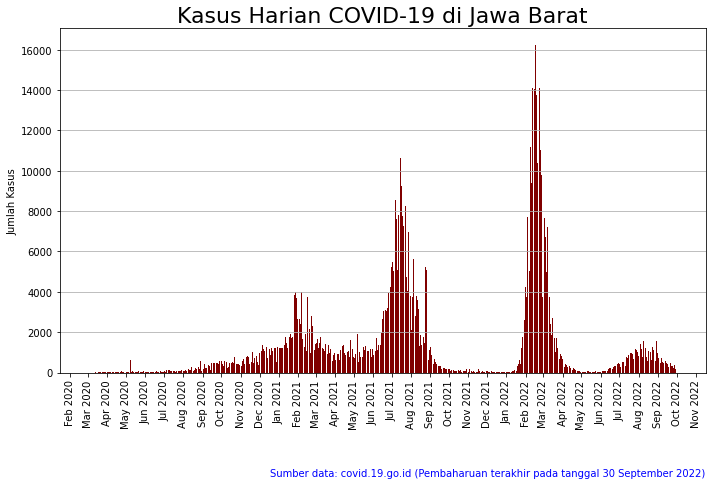

In [66]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(data=covid_jabar_tidy, x='tanggal', height='kasus_baru', color='maroon')
ax.set_title('Kasus Harian COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id (Pembaharuan terakhir pada tanggal 30 September 2022)', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

kasus_baru_tertinggi = covid_jabar_tidy['kasus_baru'].max()


ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Grafik Meninggal Akibat Covid-19 di Jawa Barat

<Figure size 432x288 with 0 Axes>

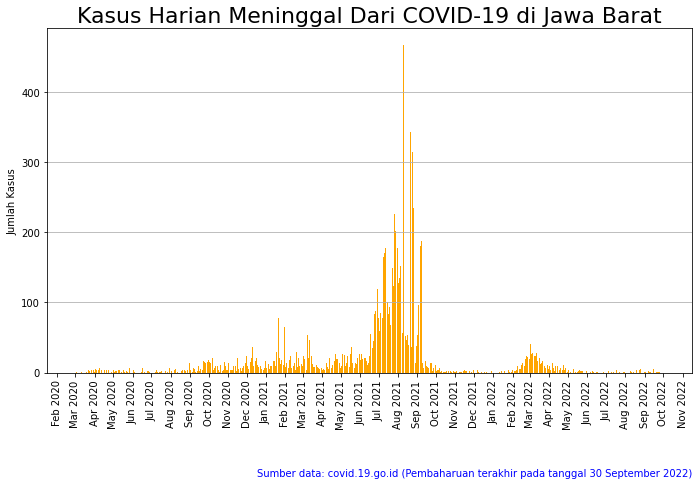

In [67]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,7))
plt.bar(data=covid_jabar_tidy, x='tanggal', height='meninggal', color='orange')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id (Pembaharuan terakhir pada tanggal 30 September 2022)', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Grafik Kesembuhan dari Covid-19 di Jawa Barat

<Figure size 432x288 with 0 Axes>

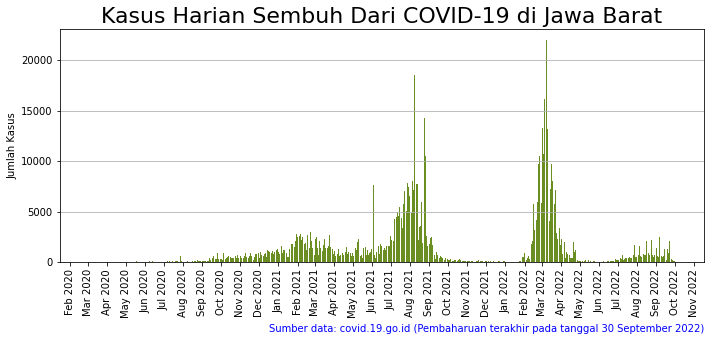

In [68]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(data=covid_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id (Pembaharuan terakhir pada tanggal 30 September 2022)', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Dinamika Harian Kasus Covid-19 di Jawa Barat

In [69]:
covid_jabar_tidy.head()

,tanggal,kasus_baru,meninggal,sembuh
0,2020-03-03,1,1,0
1,2020-03-04,1,0,0
2,2020-03-05,1,0,0
3,2020-03-06,1,0,0
4,2020-03-07,0,0,0


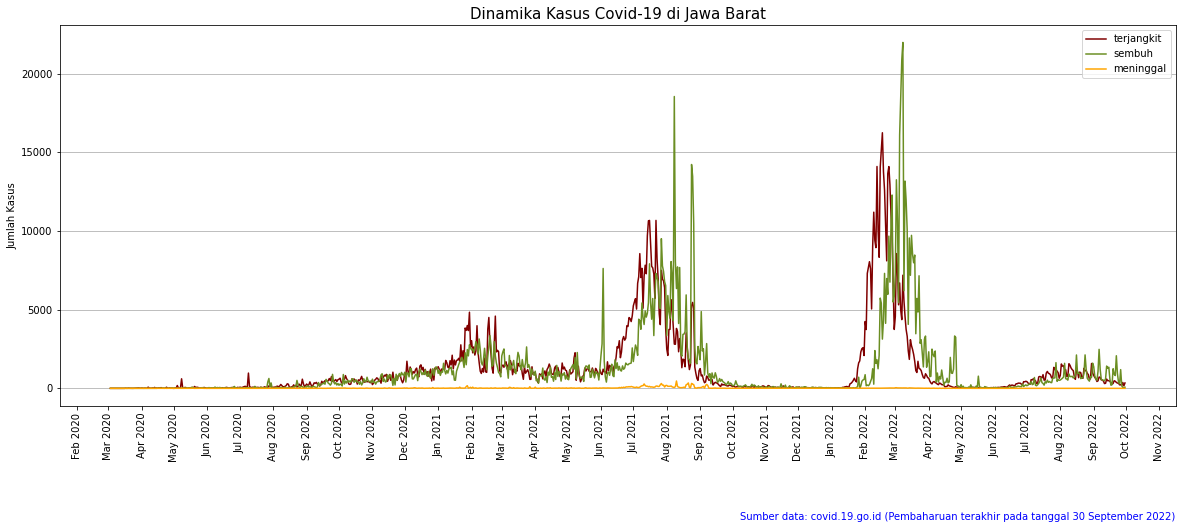

In [70]:
fig, ax = plt.subplots(figsize=(20,7))
plt.plot(covid_jabar_tidy['tanggal'],covid_jabar_tidy['kasus_baru'],marker='', color='maroon', label= 'terjangkit')
plt.plot(covid_jabar_tidy['tanggal'],covid_jabar_tidy['sembuh'],marker='', color='olivedrab', label= 'sembuh')
plt.plot(covid_jabar_tidy['tanggal'],covid_jabar_tidy['meninggal'],marker='', color='orange', label= 'meninggal')
ax.set_title('Dinamika Kasus Covid-19 di Jawa Barat', fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id (Pembaharuan terakhir pada tanggal 30 September 2022)', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.legend()
plt.show()

### Menampilkan Data pada Tahun 2022

##### Membuat Dataset baru berisi Data pada tahun 2022 saja

In [71]:
covid_jabar_tidy_2022 = covid_jabar_tidy[covid_jabar_tidy['tanggal'] >= '2022-01-01']

In [72]:
covid_jabar_tidy_2022

,tanggal,kasus_baru,meninggal,sembuh
669,2022-01-01,18,0,11
670,2022-01-02,11,0,35
671,2022-01-03,11,0,16
672,2022-01-04,32,0,23
673,2022-01-05,24,0,28
...,...,...,...,...
937,2022-09-26,231,3,1191
938,2022-09-27,181,0,169
939,2022-09-28,372,0,44
940,2022-09-29,159,0,39


##### Menampilkan Grafik dari Tiap Kasus Covid-19 di Jawa Barat pada Tahun 2022

<Figure size 432x288 with 0 Axes>

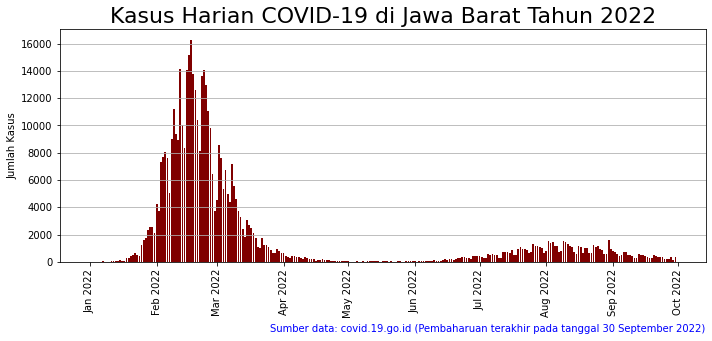

In [73]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(data=covid_jabar_tidy_2022, x='tanggal', height='kasus_baru', color='maroon')
ax.set_title('Kasus Harian COVID-19 di Jawa Barat Tahun 2022',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id (Pembaharuan terakhir pada tanggal 30 September 2022)', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

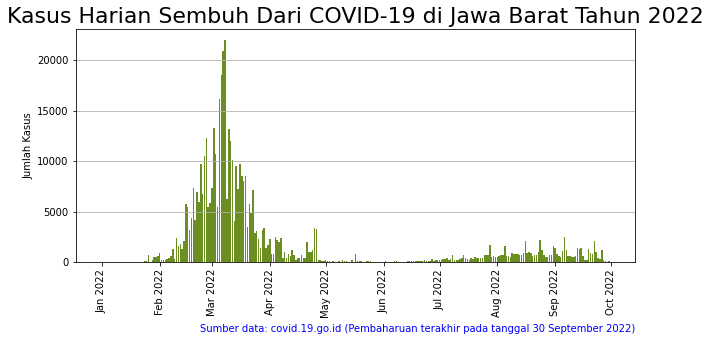

In [74]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(data=covid_jabar_tidy_2022, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat Tahun 2022',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id (Pembaharuan terakhir pada tanggal 30 September 2022)', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

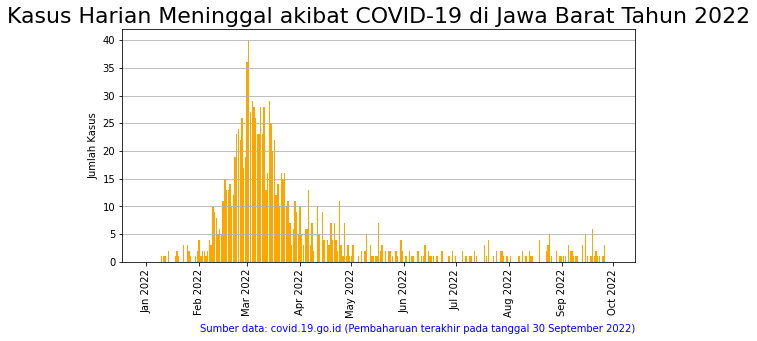

In [75]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(data=covid_jabar_tidy_2022, x='tanggal', height='meninggal', color='orange')
ax.set_title('Kasus Harian Meninggal akibat COVID-19 di Jawa Barat Tahun 2022',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id (Pembaharuan terakhir pada tanggal 30 September 2022)', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [76]:
sembuh_tertinggi = covid_jabar_tidy_2022['sembuh'].max()
sembuh_tertinggi

21994

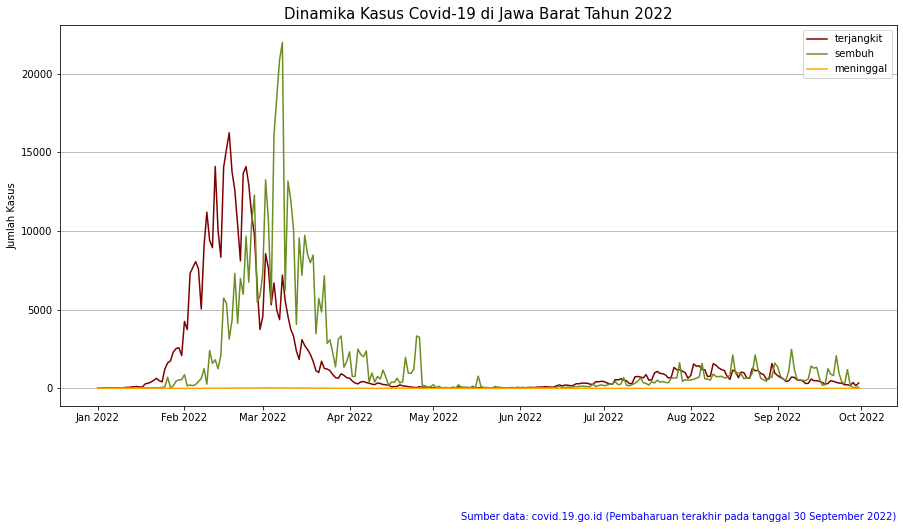

In [77]:
fig, ax = plt.subplots(figsize=(15,7))
plt.plot(covid_jabar_tidy_2022['tanggal'],covid_jabar_tidy_2022['kasus_baru'],marker='', color='maroon', label= 'terjangkit')
plt.plot(covid_jabar_tidy_2022['tanggal'],covid_jabar_tidy_2022['sembuh'],marker='', color='olivedrab', label= 'sembuh')
plt.plot(covid_jabar_tidy_2022['tanggal'],covid_jabar_tidy_2022['meninggal'],marker='', color='orange', label= 'meninggal')
ax.set_title('Dinamika Kasus Covid-19 di Jawa Barat Tahun 2022', fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id (Pembaharuan terakhir pada tanggal 30 September 2022)', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=0)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.legend()
plt.show()